## Titanic Dataset Basic EDA
### Angel Sarmiento & Jordan Douglass

The following EDA is to emphasize an understanding of Python functionality for the purpose of data analysis.

The Titanic dataset includes 12 descriptive columns for passengers aboard the sunken ship and describes details of survival.

1. Passenger ID - this string is not meaningful for our purposes and will be dropped.
2. Survived - ['0'] is in place for non-surviving passengers, ['1'] is in place for survivors.
3. Pclass - Ticket class ranges from 1-3; this is indicative of wealthclass of the passengers.
4. Name - passenger name; for our purposes, we will be focusing on the included title of passengers; Mr./Miss/Mrs. etc.
5. Sex - sex of passengers as described by their ticket (Male/Female).
6. Age - age of passengers
7. SibSp - Passengers traveling with sibling/spouse; to be dropped.
8. Parch - Parents of passengers; to be dropped
9. Ticket - ticket number; to be dropped
10. Fare - price of ticket
11. Cabin - cabin number of passenger - several empty values; to be dropped.
12. Embarked - port of boarding for passengers; C = Cherbourg; Q = Queenstown; S = Southampton.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# check for nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
title            0
dtype: int64

Above the top five entries for this dataset are shown using the head() function.

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above, we can see that there are a recorded 891 passengers counted in this dataset. The average age of passengers is 29 and the average fare price is $49.69. The average passenger was found in second class.

In [41]:
df.drop(columns=['PassengerId', 'Ticket', 'SibSp', 'Parch', 'Cabin'])

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Initial,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,Other,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,Miss,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S,Miss,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,Mr,Mr


Above, the listed columns were dropped from the dataset.

Visualized below is the countplt for survival - as 1 is the indicator for survival, nearly double the survived population perished in the sinking of the Titanic.

<AxesSubplot:xlabel='Survived', ylabel='count'>

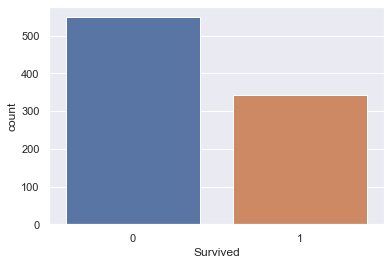

In [44]:
sns.countplot(x='Survived', data=df)

Text(0.5, 1.0, 'Gender Survival')

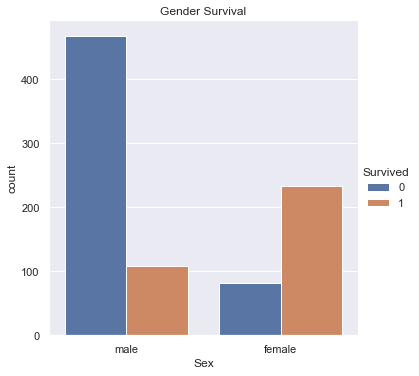

In [39]:
# gender and survival
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title('Gender Survival')

From the above graph, we can further analyze the passenger survival; women were nearly twice as likely to survive.

Text(0.5, 1.0, 'Age/Gender Survival')

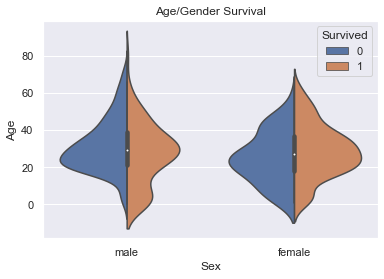

In [37]:
# gender/age survival

sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True).set_title('Age/Gender Survival')



From the above violin plot, women and children were more likely to survive.

It can be observed that during the lifeboat escape/rescue, women with children were given higher priority.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

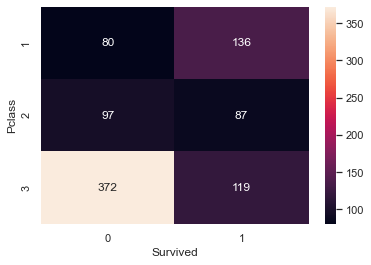

In [11]:
# group by class
group1 = df.groupby(['Pclass', 'Survived'])
class_survive = group1.size().unstack()

# heatmap 

sns.heatmap(class_survive, annot = True, fmt = "d")

The heatmap above indicates class survival; as there were three class types aboard the Titanic, we can see that more survivors were found in first class while more perished in the third class. However, we can also see that there are the least survivors in second class than both first and third.

In [12]:
scl_group = df.groupby(['Sex','Pclass'])
scl_group.agg(['max','median','mean','min'])[['Fare']]

Fare                               
                    max    median        mean      min
Sex    Pclass                                         
female 1       512.3292  82.66455  106.125798  25.9292
       2        65.0000  22.00000   21.970121  10.5000
       3        69.5500  12.47500   16.118810   6.7500
male   1       512.3292  41.26250   67.226127   0.0000
       2        73.5000  13.00000   19.741782   0.0000
       3        69.5500   7.92500   12.661633   0.0000

In [14]:
df_f = df[df['Sex']=='female']
df_f['Fare'].mean()

44.47981783439487

In [15]:
df_m = df[df['Sex']=='male']
df_f['Fare'].mean()

44.47981783439487

For both male and female passengers, the average ticket price was $44.47. Fare prices for female passengers overall based on class were on average more expensive than male passengers. 

It can be observed that men were more likely to take on working roles at the time and this may have contributed to the fare price being lower.

In [18]:
df['title']=0
for i in df:
    df['title']=df.Name.str.extract('([A-Za-z]+)\.')

df['title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
df.groupby('title')['Age'].mean()

title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

/Users/jordandouglass/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jordandouglass/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


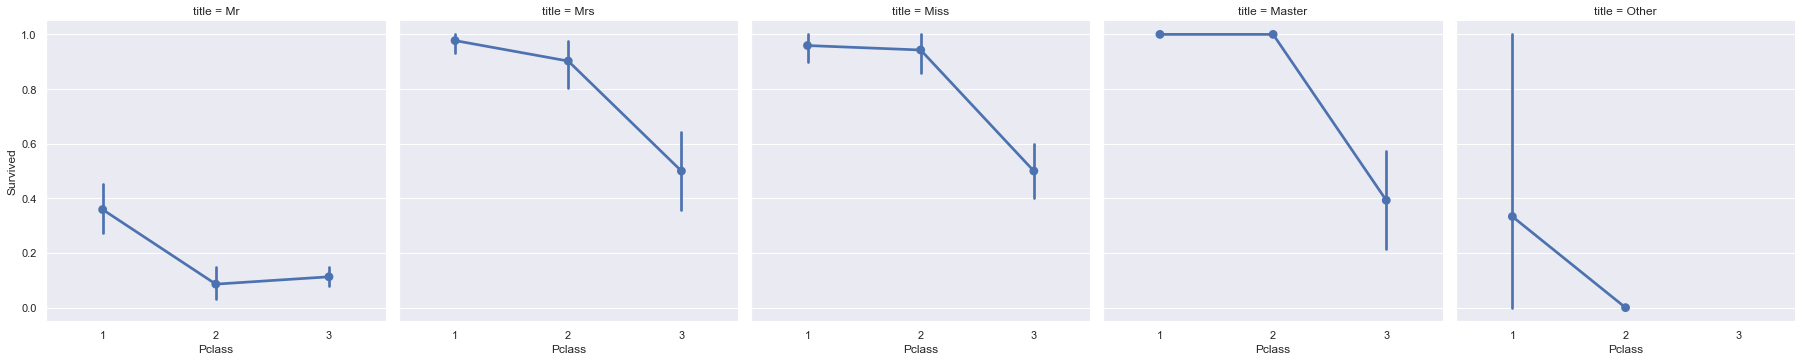

In [21]:
sns.factorplot('Pclass','Survived',col='title',data=df)
plt.show()

Text(0.5, 0.98, 'Class Survival')

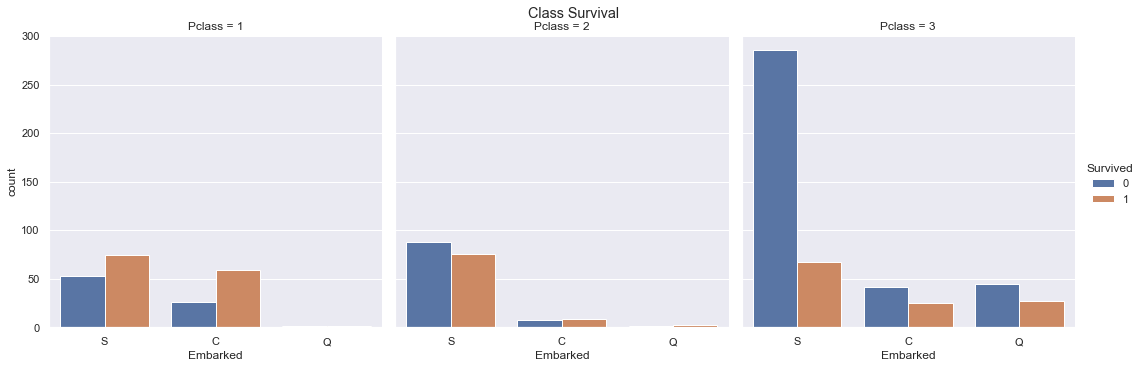

In [32]:
psur = sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = df)

psur.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
psur.fig.suptitle('Port/Class/Survival')